In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
%matplotlib inline

In [2]:
results = pd.read_csv("results.csv")
races = pd.read_csv("races.csv")
drivers = pd.read_csv("drivers.csv")
constructors = pd.read_csv("constructors.csv")

In [3]:
results.head(1)

,resultId,raceId,driverId,constructorId,number,grid,position,positionText,positionOrder,points,laps,time,milliseconds,fastestLap,rank,fastestLapTime,fastestLapSpeed,statusId
0,1,18,1,1,22,1,1,1,1,10.0,58,1:34:50.616,5690616,39,2,1:27.452,218.300,1


In [4]:
races.head(1)

,raceId,year,round,circuitId,name,date,time,url,fp1_date,fp1_time,fp2_date,fp2_time,fp3_date,fp3_time,quali_date,quali_time,sprint_date,sprint_time
0,1,2009,1,1,Australian Grand Prix,2009-03-29,06:00:00,http://en.wikipedia.org/wiki/2009_Australian_G...,\N,\N,\N,\N,\N,\N,\N,\N,\N,\N


In [5]:
drivers.head(1)

,driverId,driverRef,number,code,forename,surname,dob,nationality,url
0,1,hamilton,44,HAM,Lewis,Hamilton,1985-01-07,British,http://en.wikipedia.org/wiki/Lewis_Hamilton


In [6]:
constructors.head(1)

,constructorId,constructorRef,name,nationality,url
0,1,mclaren,McLaren,British,http://en.wikipedia.org/wiki/McLaren


In [7]:
merged_df = pd.merge(results,races[['raceId','year','name','round']],on='raceId',how= 'left') 
merged_df = pd.merge(merged_df,drivers[['driverId','driverRef','nationality']],on='driverId',how = 'left')
merged_df = pd.merge(merged_df ,constructors[['constructorId','name','nationality']],on='constructorId',how='left')

In [8]:
merged_df.head()

,resultId,raceId,driverId,constructorId,number,grid,position,positionText,positionOrder,points,...,fastestLapTime,fastestLapSpeed,statusId,year,name_x,round,driverRef,nationality_x,name_y,nationality_y
0,1,18,1,1,22,1,1,1,1,10.0,...,1:27.452,218.300,1,2008,Australian Grand Prix,1,hamilton,British,McLaren,British
1,2,18,2,2,3,5,2,2,2,8.0,...,1:27.739,217.586,1,2008,Australian Grand Prix,1,heidfeld,German,BMW Sauber,German
2,3,18,3,3,7,7,3,3,3,6.0,...,1:28.090,216.719,1,2008,Australian Grand Prix,1,rosberg,German,Williams,British
3,4,18,4,4,5,11,4,4,4,5.0,...,1:28.603,215.464,1,2008,Australian Grand Prix,1,alonso,Spanish,Renault,French
4,5,18,5,1,23,3,5,5,5,4.0,...,1:27.418,218.385,1,2008,Australian Grand Prix,1,kovalainen,Finnish,McLaren,British


In [9]:
merged_df.drop(['number','position','positionText','laps','fastestLap','statusId','resultId','raceId','driverId','constructorId'],axis=1,inplace=True)

In [10]:
merged_df.head()

,grid,positionOrder,points,time,milliseconds,rank,fastestLapTime,fastestLapSpeed,year,name_x,round,driverRef,nationality_x,name_y,nationality_y
0,1,1,10.0,1:34:50.616,5690616,2,1:27.452,218.300,2008,Australian Grand Prix,1,hamilton,British,McLaren,British
1,5,2,8.0,+5.478,5696094,3,1:27.739,217.586,2008,Australian Grand Prix,1,heidfeld,German,BMW Sauber,German
2,7,3,6.0,+8.163,5698779,5,1:28.090,216.719,2008,Australian Grand Prix,1,rosberg,German,Williams,British
3,11,4,5.0,+17.181,5707797,7,1:28.603,215.464,2008,Australian Grand Prix,1,alonso,Spanish,Renault,French
4,3,5,4.0,+18.014,5708630,1,1:27.418,218.385,2008,Australian Grand Prix,1,kovalainen,Finnish,McLaren,British


In [11]:
merged_df.rename(columns={'rank':'fastestLapRank','name_x':'gpName','nationality_x':'driverNationality','name_y':'constructorName','nationality_y':'constructorNationality','driverRef':'driver'},inplace=True)

In [12]:
merged_df.head()

,grid,positionOrder,points,time,milliseconds,fastestLapRank,fastestLapTime,fastestLapSpeed,year,gpName,round,driver,driverNationality,constructorName,constructorNationality
0,1,1,10.0,1:34:50.616,5690616,2,1:27.452,218.300,2008,Australian Grand Prix,1,hamilton,British,McLaren,British
1,5,2,8.0,+5.478,5696094,3,1:27.739,217.586,2008,Australian Grand Prix,1,heidfeld,German,BMW Sauber,German
2,7,3,6.0,+8.163,5698779,5,1:28.090,216.719,2008,Australian Grand Prix,1,rosberg,German,Williams,British
3,11,4,5.0,+17.181,5707797,7,1:28.603,215.464,2008,Australian Grand Prix,1,alonso,Spanish,Renault,French
4,3,5,4.0,+18.014,5708630,1,1:27.418,218.385,2008,Australian Grand Prix,1,kovalainen,Finnish,McLaren,British


In [13]:
#Rearranging the columns
merged_df = merged_df[['year','gpName','round','driver','constructorName','grid','positionOrder','points','time','milliseconds','fastestLapRank','fastestLapTime','fastestLapSpeed','driverNationality','constructorNationality']]

In [16]:
#dropping the 2019 season 
merged_df = merged_df[merged_df['year']!='2019']

In [15]:
merged_df.head()

,year,gpName,round,driver,constructorName,grid,positionOrder,points,time,milliseconds,fastestLapRank,fastestLapTime,fastestLapSpeed,driverNationality,constructorNationality
0,2008,Australian Grand Prix,1,hamilton,McLaren,1,1,10.0,1:34:50.616,5690616,2,1:27.452,218.300,British,British
1,2008,Australian Grand Prix,1,heidfeld,BMW Sauber,5,2,8.0,+5.478,5696094,3,1:27.739,217.586,German,German
2,2008,Australian Grand Prix,1,rosberg,Williams,7,3,6.0,+8.163,5698779,5,1:28.090,216.719,German,British
3,2008,Australian Grand Prix,1,alonso,Renault,11,4,5.0,+17.181,5707797,7,1:28.603,215.464,Spanish,French
4,2008,Australian Grand Prix,1,kovalainen,McLaren,3,5,4.0,+18.014,5708630,1,1:27.418,218.385,Finnish,British


In [18]:
merged_df = merged_df.sort_values(by=['year','round','positionOrder'],ascending = [False,True,True])

In [19]:
merged_df.head(1)

,year,gpName,round,driver,constructorName,grid,positionOrder,points,time,milliseconds,fastestLapRank,fastestLapTime,fastestLapSpeed,driverNationality,constructorNationality
25840,2023,Bahrain Grand Prix,1,max_verstappen,Red Bull,1,1,25.0,1:33:56.736,5636736,6,1:36.236,202.452,Dutch,Austrian


In [23]:
#replace the \n values

merged_df.time.replace('\\N',np.nan,inplace=True)
merged_df.milliseconds.replace('\\N',np.nan,inplace=True)
merged_df.fastestLapRank.replace('\\N',np.nan,inplace=True)
merged_df.fastestLapTime.replace('\\N',np.nan,inplace = True)
merged_df.fastestLapSpeed.replace('\\N',np.nan,inplace=True)

In [24]:
merged_df.milliseconds = merged_df.milliseconds.astype(float)
merged_df.fastestLapRank = merged_df.fastestLapRank.astype(float)
merged_df.fastestLapSpeed = merged_df.fastestLapSpeed.astype(float)

In [25]:
merged_df.reset_index(drop=True,inplace=True)

In [27]:
merged_df.head(1)

,year,gpName,round,driver,constructorName,grid,positionOrder,points,time,milliseconds,fastestLapRank,fastestLapTime,fastestLapSpeed,driverNationality,constructorNationality
0,2023,Bahrain Grand Prix,1,max_verstappen,Red Bull,1,1,25.0,1:33:56.736,5636736.0,6.0,1:36.236,202.452,Dutch,Austrian


In [28]:
merged_df.shape

(26080, 15)

In [52]:
sns.set_palette('Set3')
plt.rcParams['figure.figsize'] = 10,6


In [53]:
#finding all the drivers who have won a Race

driver_winner = merged_df.loc[merged_df['positionOrder']==1].groupby('driver')['positionOrder'].count().sort_values(ascending=False).to_frame().reset_index()

### Plotting the number of wins per driver

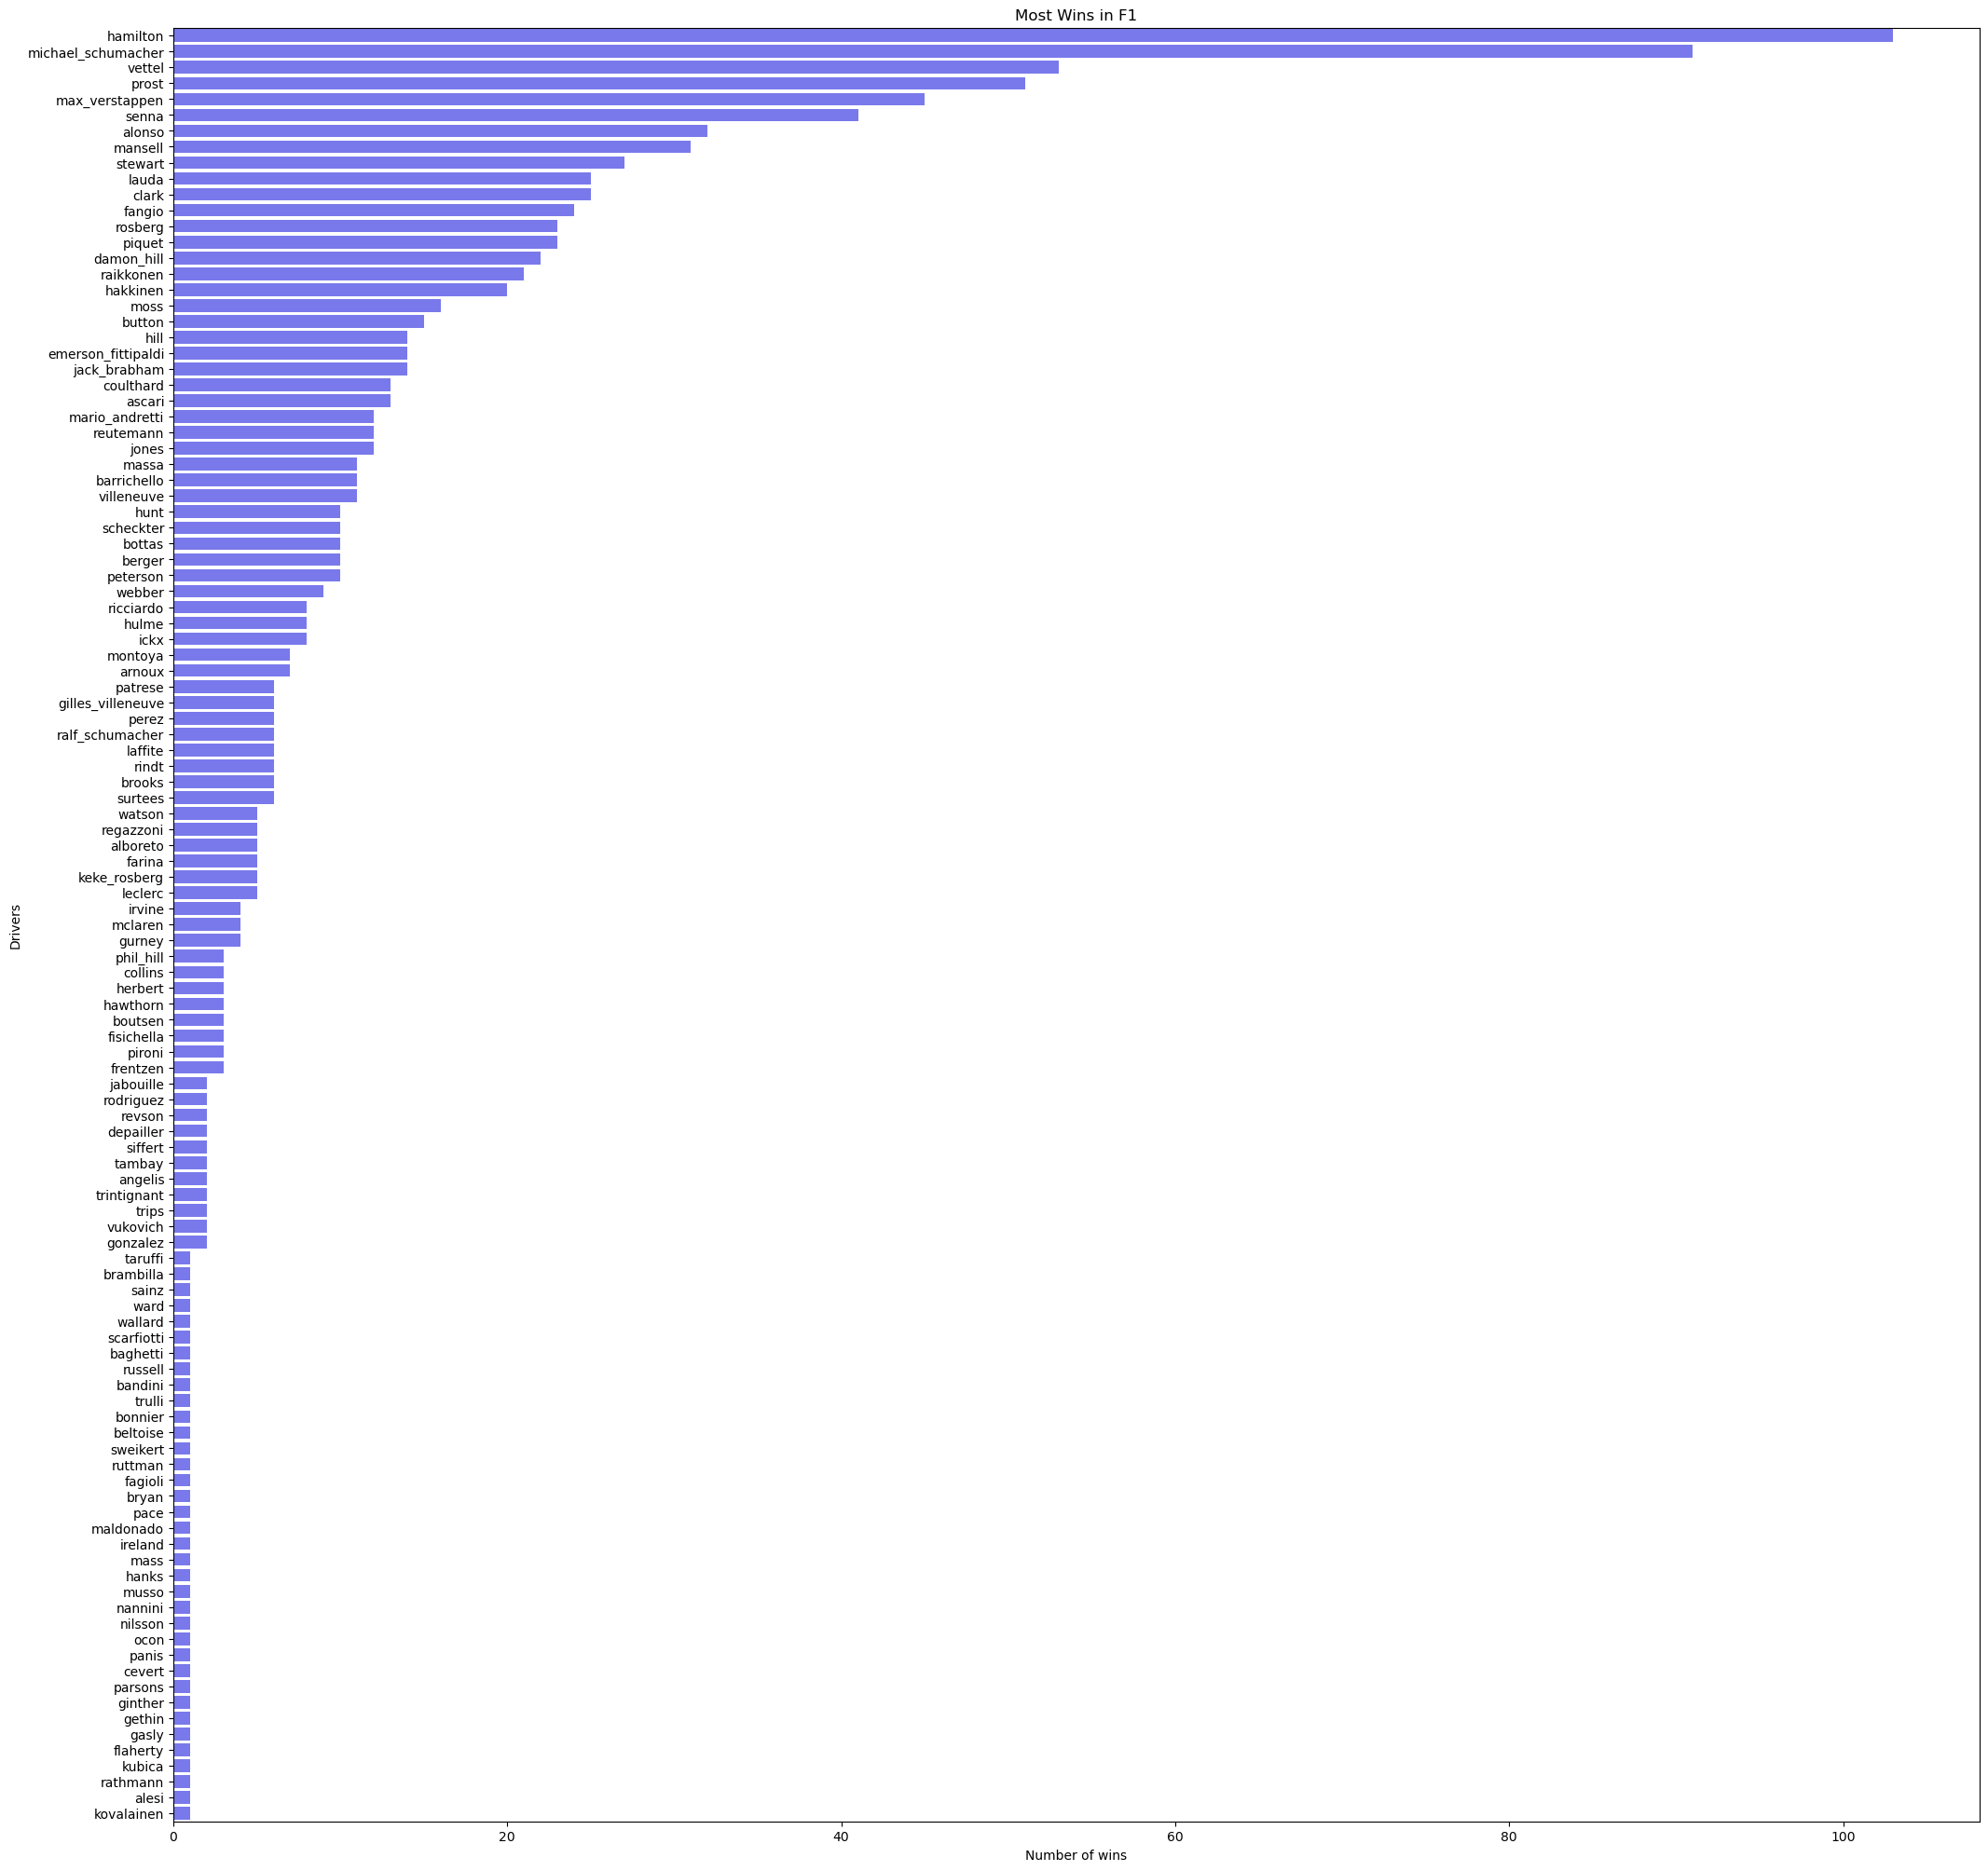

In [54]:
plt.figure(figsize=(25,25))
sns.barplot(data=driver_winner,y='driver',x='positionOrder',color='blue',alpha = 0.6)
plt.title("Most Wins in F1")
plt.ylabel('Drivers')
plt.xlabel('Number of wins')
plt.show()

In [55]:
top10drivers = driver_winner.head(10)
top10drivers

,driver,positionOrder
0,hamilton,103
1,michael_schumacher,91
2,vettel,53
3,prost,51
4,max_verstappen,45
5,senna,41
6,alonso,32
7,mansell,31
8,stewart,27
9,lauda,25


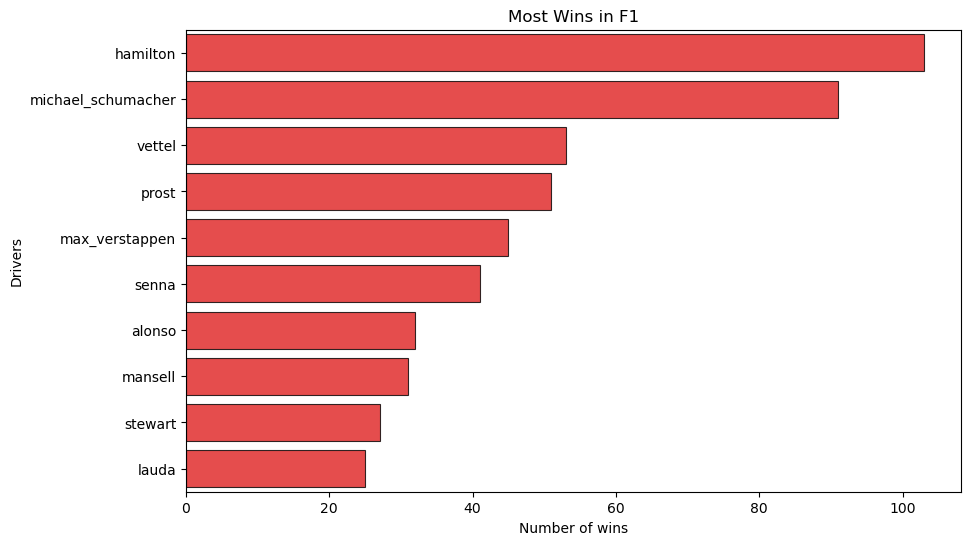

In [56]:
sns.barplot(data = top10drivers,y='driver',x='positionOrder',color='red',alpha = 0.8,linewidth = .8,edgecolor = 'black')
plt.title("Most Wins in F1")
plt.ylabel('Drivers')
plt.xlabel('Number of wins')
plt.show()

## Now for Constructors  

In [57]:
constructor_winner = merged_df.loc[merged_df['positionOrder']==1].groupby('constructorName')['positionOrder'].count().sort_values(ascending=False).to_frame().reset_index()

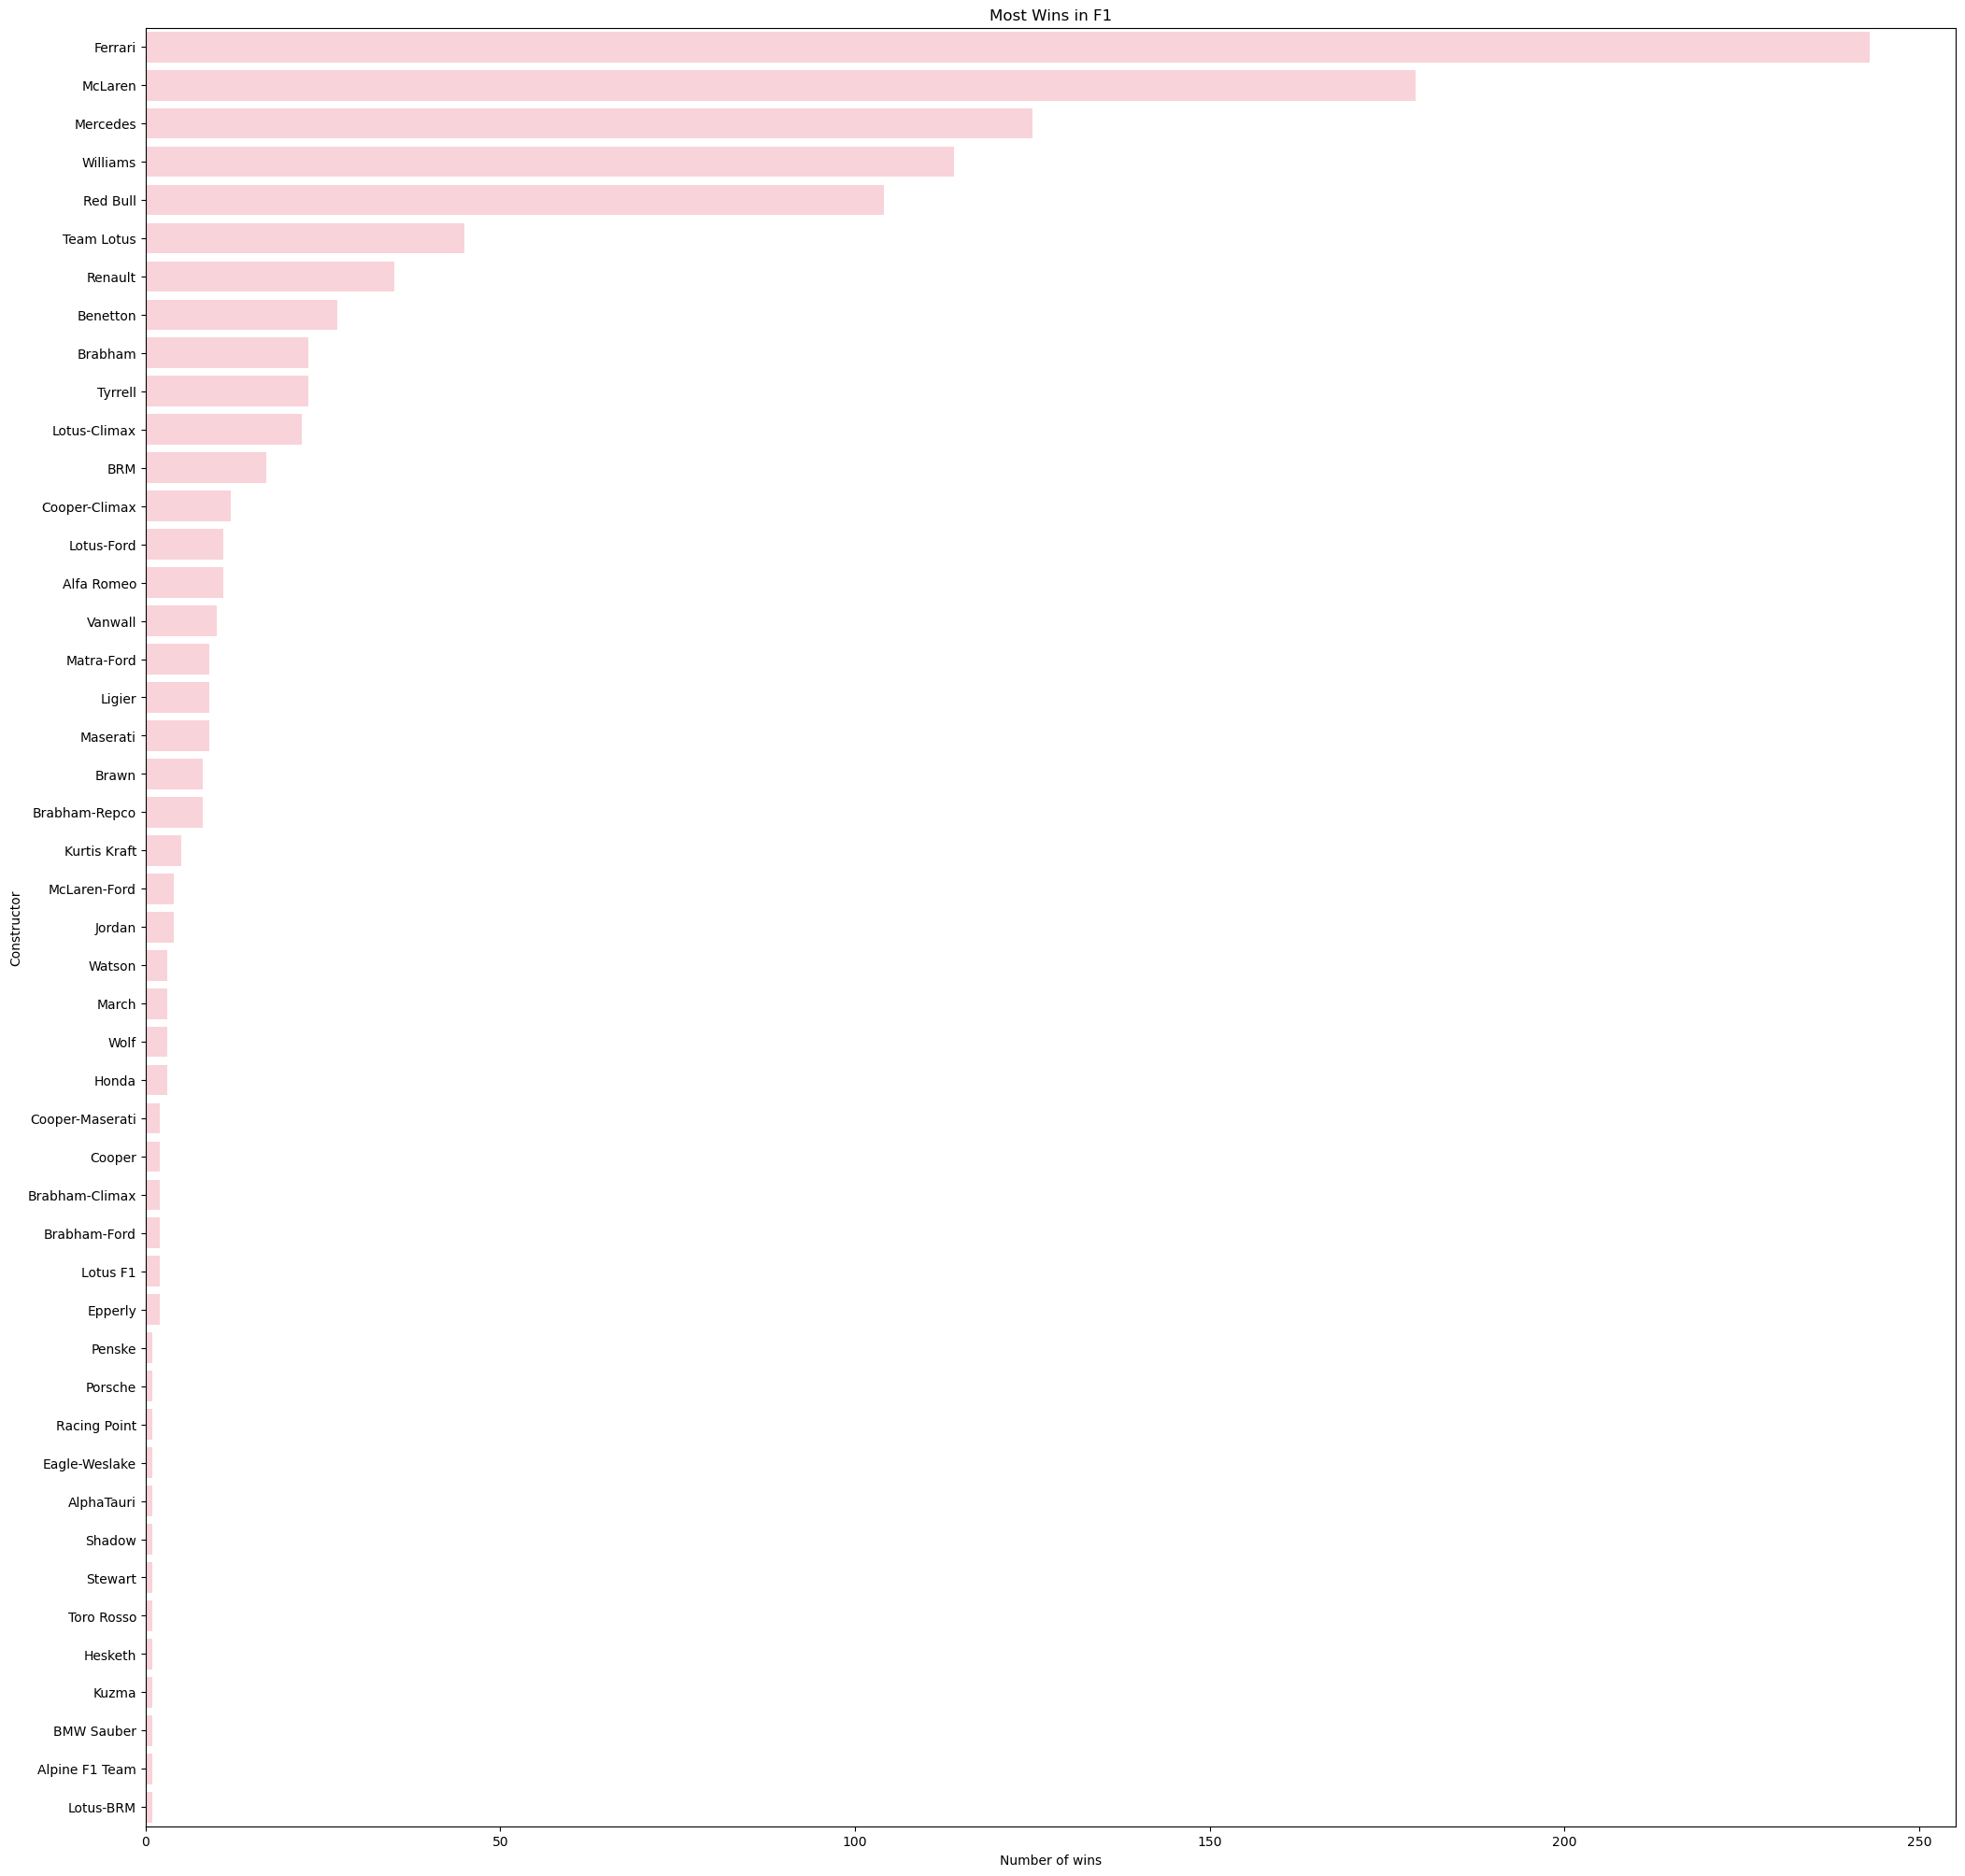

In [64]:
plt.figure(figsize=(25,25))
sns.barplot(data=constructor_winner,y='constructorName',x='positionOrder',color='pink',alpha = 0.8)
plt.title("Most Wins in F1")
plt.ylabel('Constructor')
plt.xlabel('Number of wins')
plt.show()

In [60]:
top10constructors = constructor_winner.head(10)
top10constructors

,constructorName,positionOrder
0,Ferrari,243
1,McLaren,179
2,Mercedes,125
3,Williams,114
4,Red Bull,104
5,Team Lotus,45
6,Renault,35
7,Benetton,27
8,Brabham,23
9,Tyrrell,23


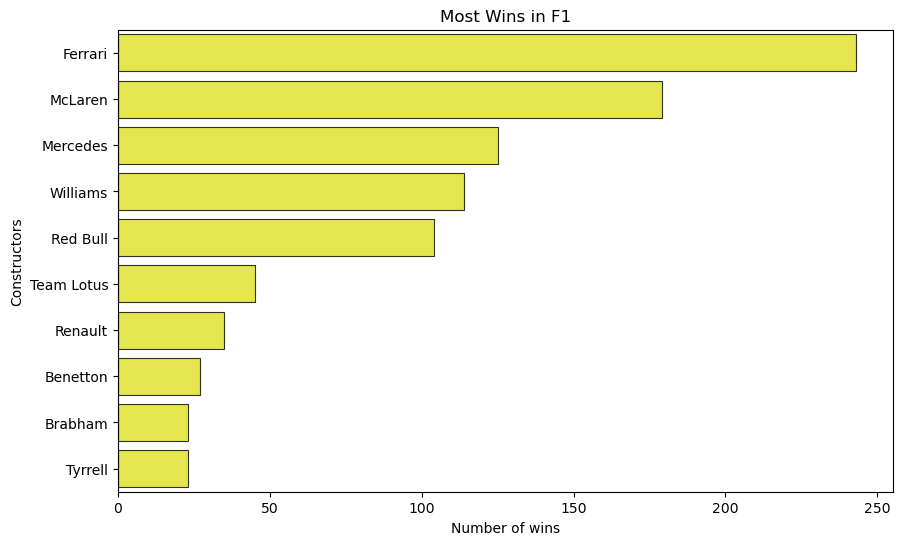

In [62]:
sns.barplot(data = top10constructors,y='constructorName',x='positionOrder',color='yellow',alpha = 0.8,linewidth = .8,edgecolor = 'black')
plt.title("Most Wins in F1")
plt.ylabel('Constructors')
plt.xlabel('Number of wins')
plt.show()

## now plotting a graph for start vs finish on the grid 

In [66]:
new_df = merged_df[merged_df['grid']!=0]

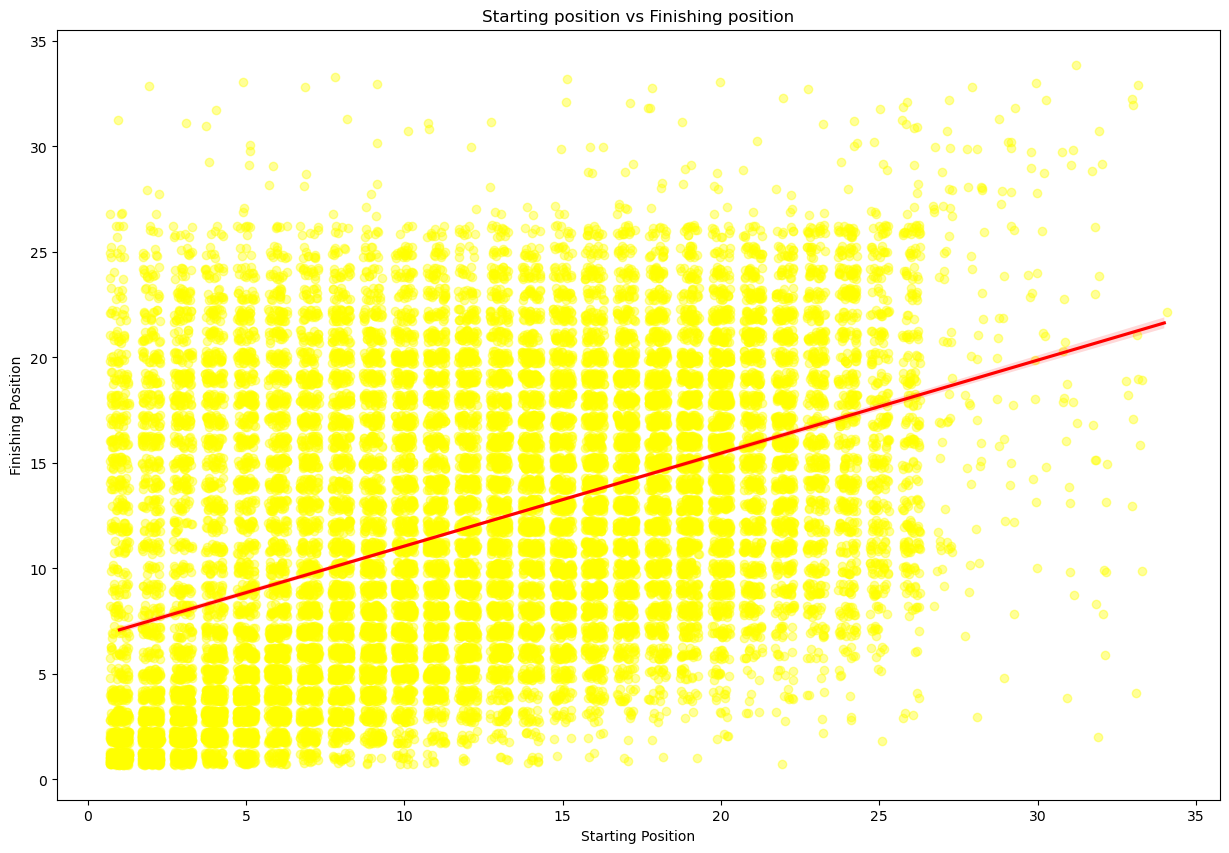

In [75]:
plt.figure(figsize=[15,10])
sns.regplot(data= new_df,x='grid',y='positionOrder',x_jitter=0.3,y_jitter=0.3, 
            scatter_kws={'alpha': 0.4, 'color': 'yellow'},line_kws={'color': 'red'})
plt.title('Starting position vs Finishing position')
plt.xlabel('Starting Position')
plt.ylabel('Finishing Position')
plt.show()


## Lastly plotting the speed data of all cars from all the seasons 

Text(0.5, 0.98, "Average Speed amongst all the teams during the fastest lap at individual GP's")

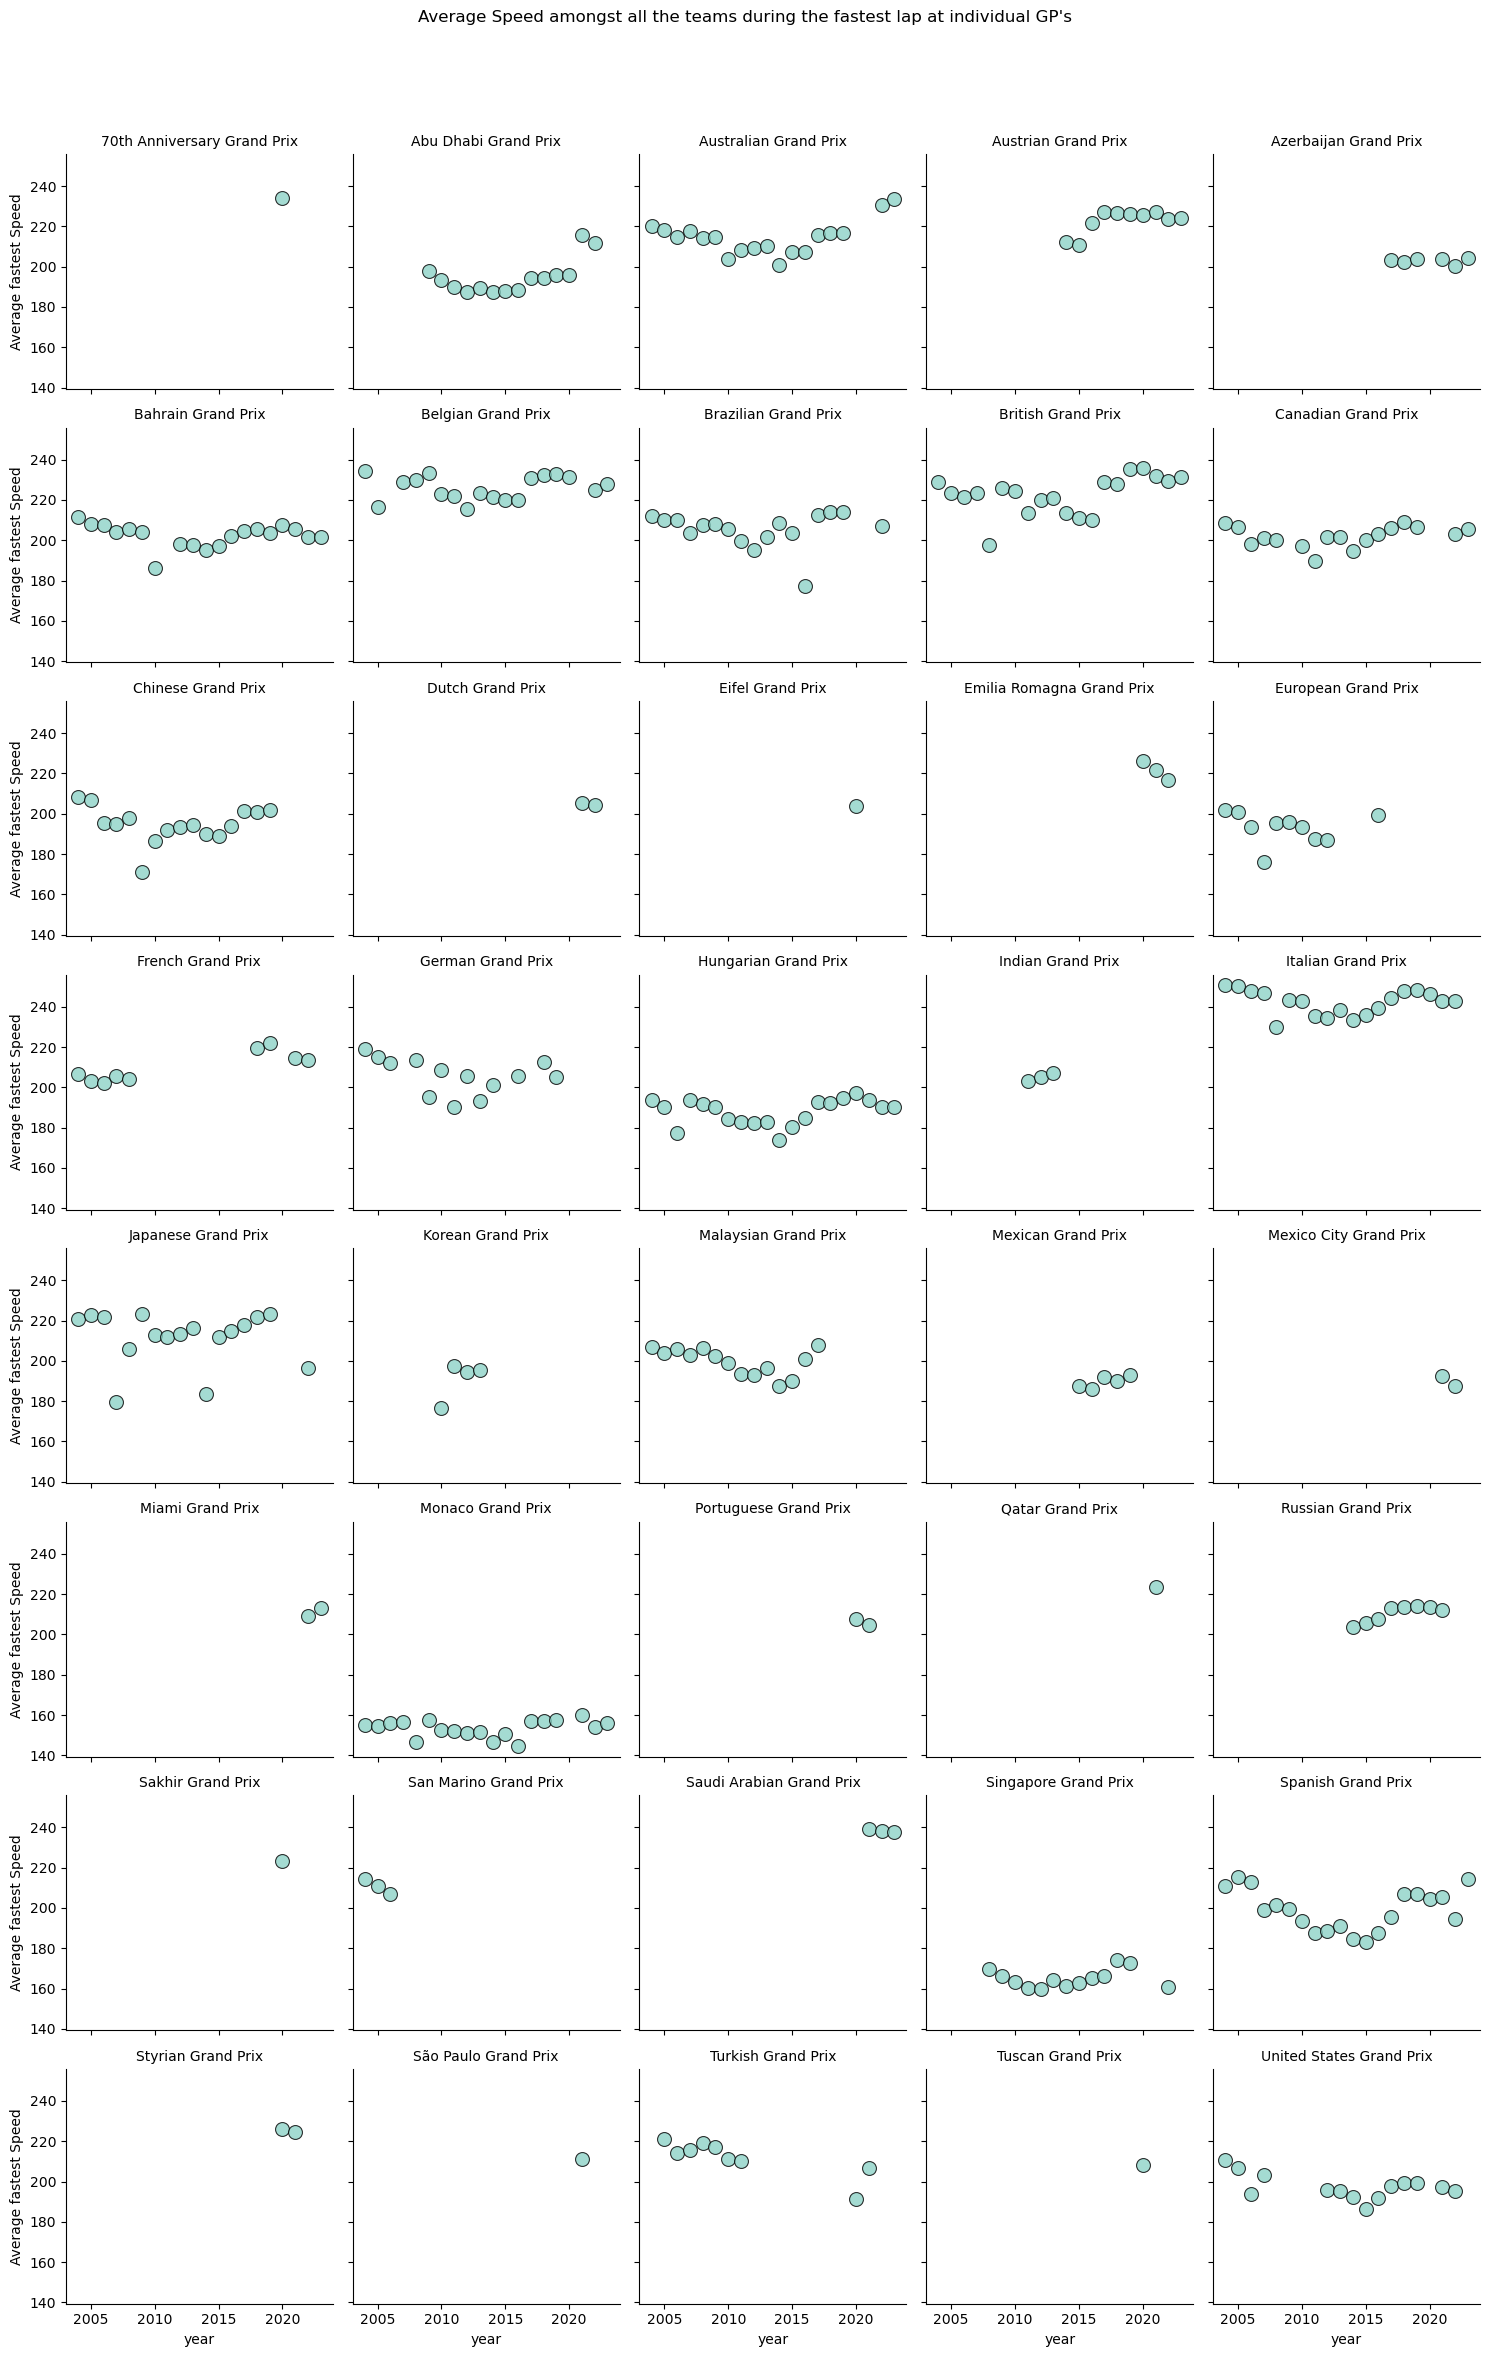

In [79]:
speed_df = merged_df[merged_df['year']>=2004]
speed_df = speed_df.groupby(['gpName','year'])['fastestLapSpeed'].mean().to_frame().reset_index()
gp = sns.FacetGrid(data= speed_df,col = 'gpName',col_wrap = 5)
gp.map(plt.scatter,'year','fastestLapSpeed',alpha = 0.8,linewidth=0.8,edgecolor = 'black',s=100)
gp.set_titles("{col_name}")
gp.set_xlabels('year')
gp.set_ylabels('Average fastest Speed')
plt.subplots_adjust(top=.92)
gp.fig.suptitle("Average Speed amongst all the teams during the fastest lap at individual GP's")


,name = ['result_id','race_id','driver_id','constructor_id','number','grid','position','position_text','position_order','points','laps','time','milliseconds','fastest_lap','rank','fastest_lap_time','fastest_lap_speed','status_id'],header= None

,names = ['race_id','year','round','circuit_id','name','date','time','url'],header = None

,names = ['driver_id','driver_ref','number','code','forename','surname','dob','nationality','url'],header = None

,names = ['constructors_id','constructors_ref','name','nationality','url'],header = None